<a href="https://colab.research.google.com/github/jpark0118/vehicle-analysis/blob/main/DAT301_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Vehicle Sales Recommendation
### Jennifer Park

April 27, 2024

## Getting Started
For the predictive model, the first step is to ensure the availability of all necessary data. The “Vehicle Sales
and Market Trends” dataset offers a comprehensive collection of information related to sales transactions of
various vehicles. This dataset includes details such as the year, make, model, trim, body type, transmission
type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior
and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

[NOTE: "Vehicle Sales and Market Trends" is a publicly available dataset published by Syed Anwar on Kaggle.](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data)

## Import Libraries

To enhance the analysis and modeling capabilities for our project, several libraries are utilized:
* `matplotlib`: Provides a powerful framework for creating complex and aesthetically pleasing visualizations.
* `pandas`: Offers a suite of functions for data manipulation tasks, making data transformations and tidying data for later analysis.
* `seaborn`: A visualization library based on matplotlib that simplifies creating complex visualizations like heatmaps or violin plots.
* `statsmodels`: Used for statistical modeling. This includes regression analyses, time-series analysis, and hypothesis testing.
* `plotly`: Under its express module, it provides tools for creating interactive charts and dashboards for web applications.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotly import express as px

## Quick Overview of the Data
Before we jump into processing the data, let's familiarize ourselves with the data we just imported.

The “Vehicle Sales and Market Trends Dataset” serves as an exhaustive repository of data pertaining to
vehicle sales transactions. It catalogs comprehensive details across sixteen fields, covering various aspects
from vehicle specifics to transactional and market trend information.

Dataset Fields Overview:

* Vehicle Details: This category captures essential attributes of the vehicles, including their make, model, trim, body type, year of manufacture, and transmission type. These fields offer precise identification and classification of each vehicle, facilitating detailed analyses based on vehicle specifications.

* Identification and Registration: The dataset includes the Vehicle Identification Number (VIN) and the state of registration. The VIN serves as a unique identifier for each vehicle, while the registration state provides geographical context for the transaction.

* Condition and Mileage: Vehicles are assessed with a condition rating on a scale of 1-50, alongside their odometer readings. This information is crucial for evaluating the impact of vehicle condition and usage on their selling price.

* Color and Seller Details: Information\ on the exterior and interior colors of the vehicles and details about the sellers enriches the dataset, allowing for nuanced market analyses.

* Market Valuation and Sales: The dataset incorporates Manheim Market Report (MMR) values, which estimate the market value of each vehicle. This, combined with data on selling prices and sale dates, enables comprehensive studies on market trends, price determinations, and sales dynamics.


Fields Summary:
* Year: Manufacturing year of the vehicle.
* Make: Brand of the vehicle, represented as a string.
* Model: Specific model of the vehicle, also a string.
* Trim: The variant of the model, noted as a string.
* Body: Type of vehicle body, documented as a string.
* Transmission: Type of transmission, recorded as a string.
* VIN: Vehicle Identification Number, a unique identifier.
* State: State of vehicle registration, listed as a string.
* Condition: Condition rating of the vehicle, on a scale of 1-50.
* Odometer: Reading of the vehicle’s odometer.
* Color: Exterior color of the vehicle, a string.
* Interior: Interior color scheme, noted as a string.
* Seller: Information about the seller, provided as a string.
* MMR: Manheim Market Report value, an integer representing market value.
* Selling Price: Final selling price of the vehicle.
* Sale Date: The date on which the sale transaction was completed, formatted as a string.

In [ ]:
cars_df = pd.read_csv('/content/car_prices.csv', sep=',')

In [ ]:
rows = len(cars_df)
print("Number of rows in the dataset:", rows)

Number of rows in the dataset: 558837


In [ ]:
cars_df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


In [ ]:
cars_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
cars_df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

## Pre-Processing the Data

Data pre-processing involves standardizing the “Body” and “Transmission” fields and addressing missing values in the “Interior” field to ensure data integrity and consistency across our dataset.
* Standardizing “Body” Field: Unifying similar categories for clearer analysis.
* Cleaning “Transmission” Field: Removing irrelevant entries.
* Handling Missing “Interior” Information: Ensuring completeness of data.
* Remove NA: Drops any rows that contain missing values (NaN).

In [ ]:
cars_df['body'] = cars_df['body'].replace('sedan', 'Sedan')

In [ ]:
cars_df['transmission'] = cars_df['transmission'].apply(lambda x: None if x in ['sedan', 'Sedan'] else x)

In [ ]:
cars_df['interior'] = cars_df['interior'].replace('—', None)

In [ ]:
cars_df = cars_df.dropna()

With cleaning the dataset, it should be more evident and clear to view the datapoints on the historical vehicle sales:

In [ ]:
cars_df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,462461.000000,462461,462461,462461,462461,462461,462461,462461,462461.000000,462461.000000,462461,462461,462461,462461.000000,462461.000000,462461
unique,NaN,53,767,1492,84,2,456095,34,NaN,NaN,20,16,11777,NaN,NaN,3587
top,NaN,Ford,Altima,Base,Sedan,automatic,wddgf56x78f009940,fl,NaN,NaN,black,black,ford motor credit company llc,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,79717,16134,47494,206918,446580,4,73321,NaN,NaN,91410,209865,17574,NaN,NaN,4927
mean,2010.232967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.840990,66496.722141,NaN,NaN,NaN,13848.998889,13706.344449,NaN
std,3.799972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.233278,51741.336238,NaN,NaN,NaN,9490.414816,9568.436261,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,28132.000000,NaN,NaN,NaN,7500.000000,7200.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,50947.000000,NaN,NaN,NaN,12350.000000,12200.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,96199.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


Proceeding to data exploration provides a better understanding of the dataset being analyzed!

# Data Exploration
In data exploration, we want to understand the distribution and relationships between certain variable types.

In [ ]:
# Grouping sedan variations
def body_group(x):
    if 'sedan' in x.lower() or x == 'G Sedan':
        return 'Sedan'
    elif x in ['SUV', 'Sedan', 'Convertible', 'Hatchback', 'Minivan', 'Wagon', 'Coupe']:
        return x
    else:
        return 'Other'

cars_df['grouped_body'] = cars_df['body'].apply(body_group)

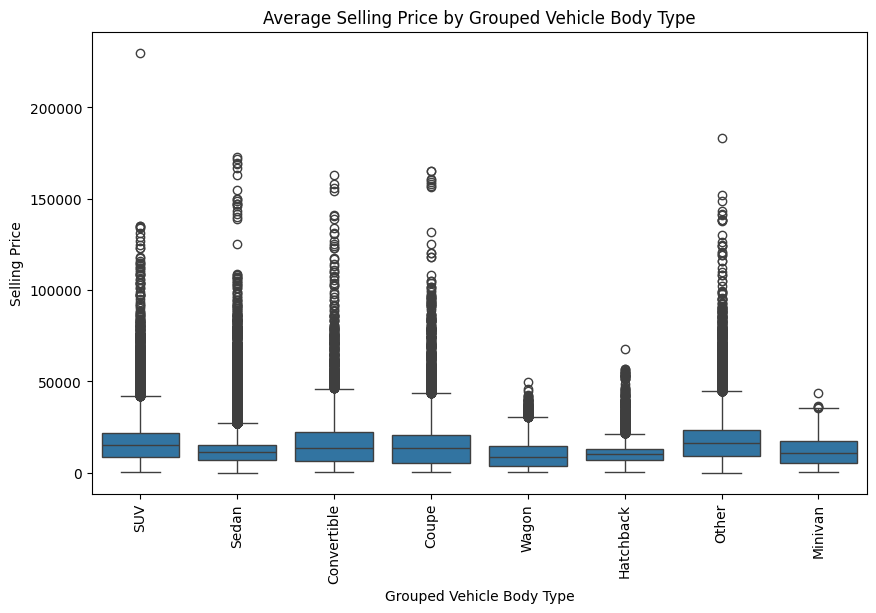

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='grouped_body', y='sellingprice', data=cars_df)
plt.xticks(rotation=90)
plt.title('Average Selling Price by Grouped Vehicle Body Type')
plt.xlabel('Grouped Vehicle Body Type')
plt.ylabel('Selling Price')
plt.show()

The bar graph above explores the impact of body type on selling prices for the vehicles in the data set. We can conclude that SUV vehicles are priced the highest compared to the other body types. The second highest priced vehicle is in the "Other" column, which includes crew cabs, king cabs, etc.

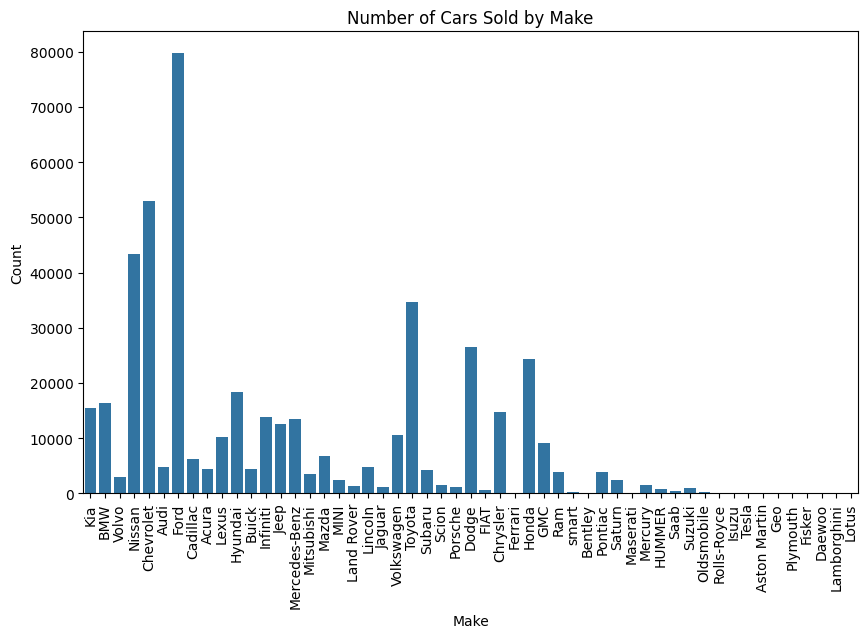

In [ ]:
# Bar plot for vehicle make
plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=cars_df)
plt.xticks(rotation=90)
plt.title('Number of Cars Sold by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

This bar graph explores the relationship between the make of a car and the purchase frequency. We can draw the conclusion that Ford, Chevrolet, Nissan, and Toyota are purchased more frequently than other brands of vehicles.

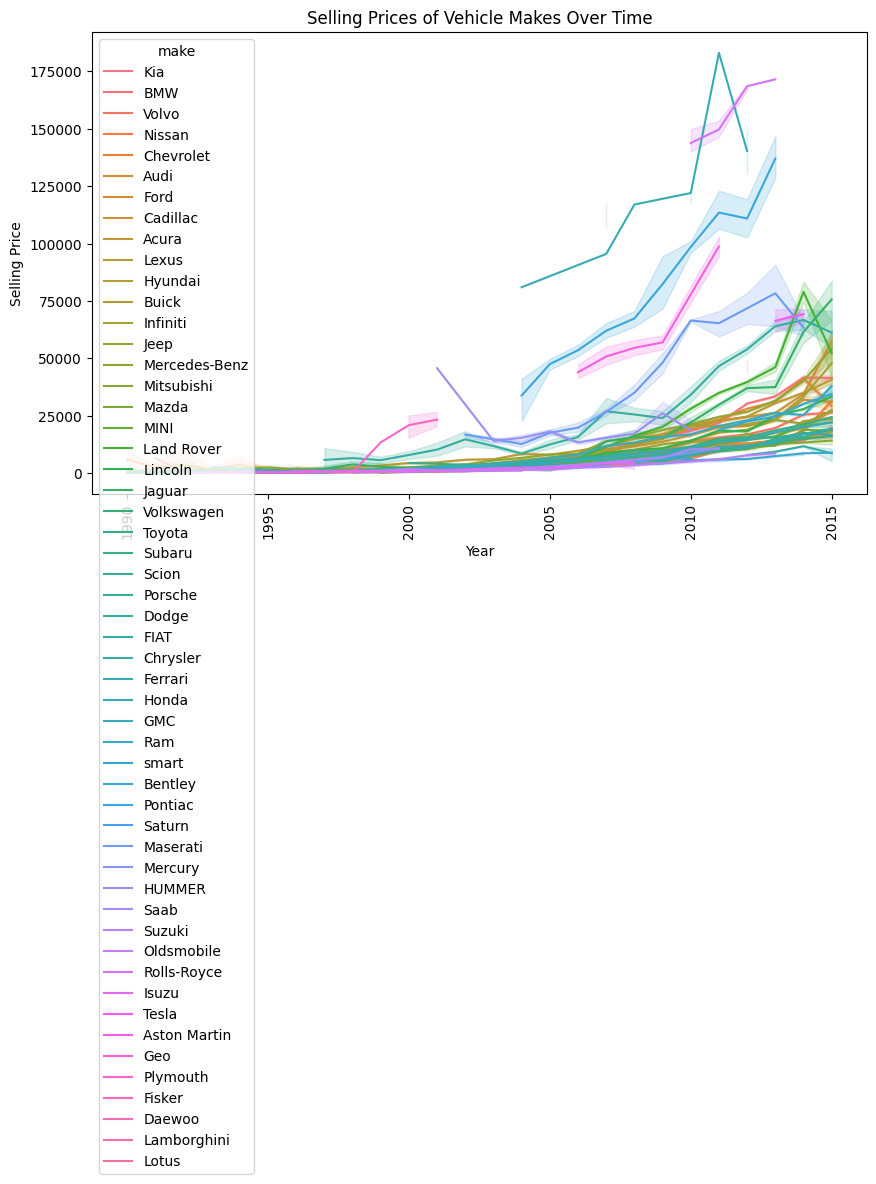

In [ ]:
# Line/Time graph for prices over years by vehicle make
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='sellingprice', hue='make', data=cars_df)
plt.xticks(rotation=90)
plt.title('Selling Prices of Vehicle Makes Over Time')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

The line/time graph dives into the depreciation and appreciation of car makes throughout the years 1990-2015.

In [ ]:
# Crosstab of year and transmission
YT = pd.crosstab(cars_df["year"], cars_df["transmission"])

# Plotting using Plotly for dynamic visualizations
fig = px.line(YT, title="Distribution of Transmission Types")
fig.update_layout(xaxis_title='Year', yaxis_title='Count of Cars', legend_title='Transmission Type')
fig.show()

The line graph above visualizes the count of cars by transmission type across all years. The data concludes that automatic transmission types have retained their value with mileage and have grown in popularity over the years.

In [ ]:
ST = pd.crosstab(cars_df["state"], cars_df["transmission"])
px.line(ST, title= "Distribution of ST all cars")

The line graph above shows a distribution of manual and automatic cars in the United States. We can conclude that manual transmission vehicles are not as popular as automatic across all states. While the graph provides great insight, we cannot draw an accurate conclusion due to unequal population densities among these states.

# Predictive Modeling
Predictive Modeling: Can employ this data set to develop predictive models for estimating vehicle prices based on various attributes.

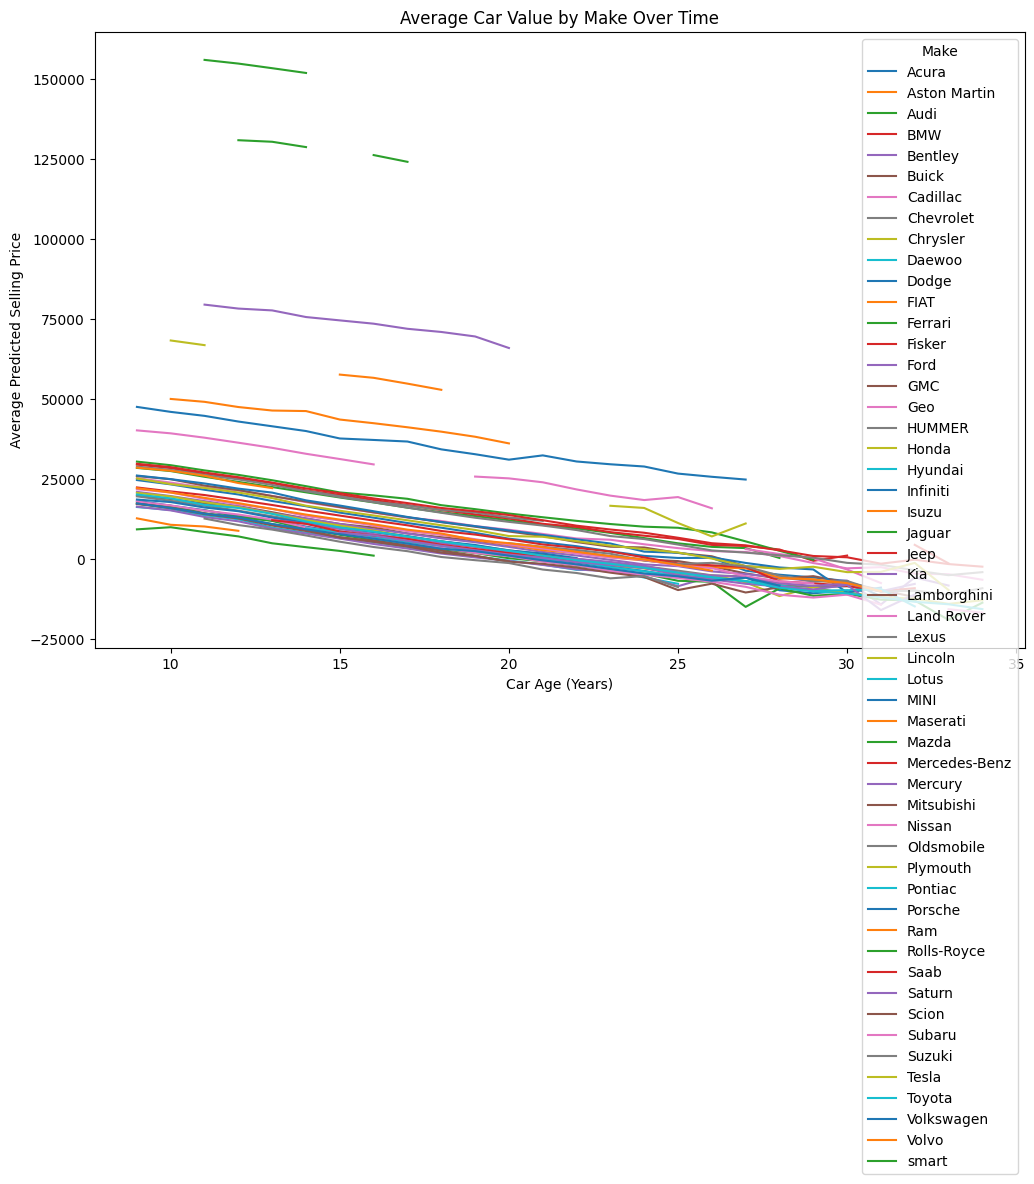

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


cars_df['make'] = cars_df['make'].astype('category')
cars_df['car_age'] = 2024 - cars_df['year']

X = pd.get_dummies(cars_df[['odometer', 'condition', 'car_age', 'make']], drop_first=True)
y = cars_df['sellingprice']


model = LinearRegression()
model.fit(X, y)

cars_df['predicted_price'] = model.predict(X)


average_price_by_make = cars_df.groupby(['make', 'car_age']).agg(Average_Price=('predicted_price', 'mean')).reset_index()


plt.figure(figsize=(12, 8))
for label, grp in average_price_by_make.groupby('make'):
    plt.plot(grp['car_age'], grp['Average_Price'], label=label)
plt.xlabel("Car Age (Years)")
plt.ylabel("Average Predicted Selling Price")
plt.title("Average Car Value by Make Over Time")
plt.legend(title="Make")
plt.show()



To conduct our analysis in Python, we relied on essential libraries for data analysis and visualization:

We utilized scikit-learn for predictive modeling, specifically employing a linear regression model. This model considered features like odometer readings, car condition, age, and make to predict the condition of cars.

For creating static plots, we turned to matplotlib. This library enabled us to generate a graph where each car make was represented as a unique line. The x-axis denoted the car's age, while the y-axis indicated the average predicted condition.

To add interactivity to our visualizations, we leveraged plotly. This library allowed us to create dynamic, web-based graphics, enhancing user engagement by enabling hover-over interactions for detailed insights.

Through our analysis, we observed a general downward trend in condition over time for most car makes, reflecting the typical depreciation of vehicles as they age. The intertwined lines on the plot showcased market variability, indicating variations in depreciation rates among different car makes.

Overall, our visual analysis provided valuable insights into car condition trends over time, facilitating informed decision-making for consumers and businesses in the automotive sector.

<ipython-input-19-7e8ec4a09309>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



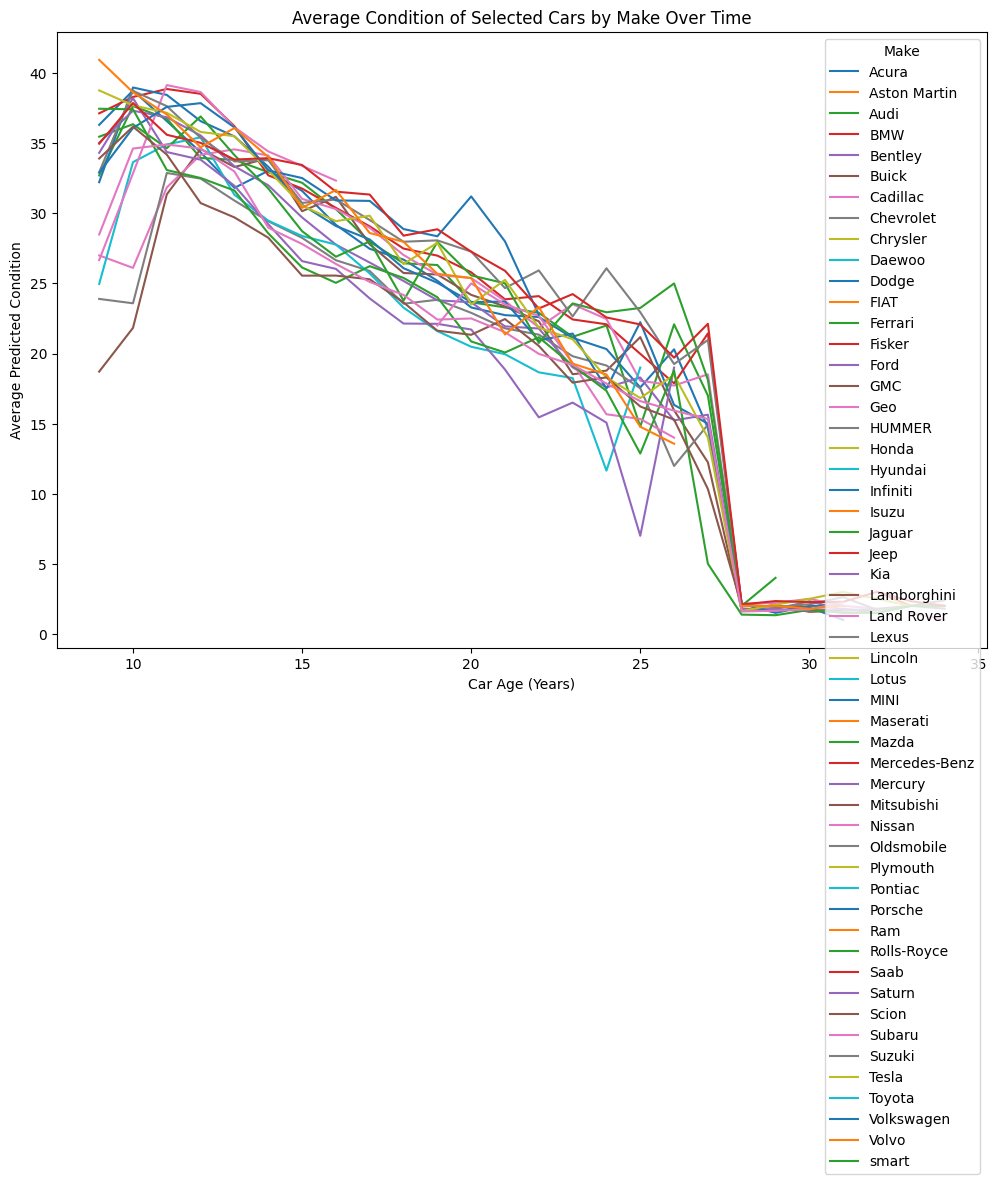

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cars_df is the DataFrame containing the car data

# Data Preprocessing
cars_df['make'] = cars_df['make'].astype('category')
cars_df['car_age'] = 2024 - cars_df['year']

# List of selected car makes
selected_makes = ['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford', 'Hyundai', 'Buick',
                  'Cadillac', 'Acura', 'Lexus', 'Acura', 'Infiniti', 'Mercedes-Benz', 'Mitsubishi',
                  'Mazda', 'MINI', 'Land Rover', 'Lincoln', 'Jaguar']

# Filter the DataFrame for selected car makes
cars_df_selected = cars_df[cars_df['make'].isin(selected_makes)]

X = pd.get_dummies(cars_df_selected[['odometer', 'condition', 'car_age', 'make']], drop_first=True)
y = cars_df_selected['condition']

# Model Selection and Training
model = LinearRegression()
model.fit(X, y)

# Make predictions
cars_df_selected.loc[:, 'predicted_condition'] = model.predict(X)

average_condition_by_make = cars_df_selected.groupby(['make', 'car_age']).agg(Average_Condition=('predicted_condition', 'mean')).reset_index()

plt.figure(figsize=(12, 8))
for label, grp in average_condition_by_make.groupby('make'):
    plt.plot(grp['car_age'], grp['Average_Condition'], label=label)
plt.xlabel("Car Age (Years)")
plt.ylabel("Average Predicted Condition")
plt.title("Average Condition of Selected Cars by Make Over Time")
plt.legend(title="Make")
plt.show()


This visualization explores how the average predicted condition of selected car makes changes over time. Using a dataset containing car attributes like odometer reading, condition, age, and make, a Linear Regression model was trained to predict the condition of cars. The selected car makes include Kia, BMW, Volvo, Nissan, Chevrolet, Audi, Ford, Hyundai, Buick, Cadillac, Acura, Lexus, Infiniti, Mercedes-Benz, Mitsubishi, Mazda, MINI, Land Rover, Lincoln, and Jaguar. Each line on the graph represents the average predicted condition of cars from a specific make over different ages. Understanding these trends can aid car buyers, sellers, and manufacturers in making informed decisions about maintenance, pricing, and product development strategies.



# Conclusion
Using our data manipulation techniques, we were able to predict the relationship between miles accumulated over time and their selling prices. We were also able to identify patterns between certain variables in the data set.